In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('MarketData.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


Text(0.5, 1.0, 'Stock opening Price')

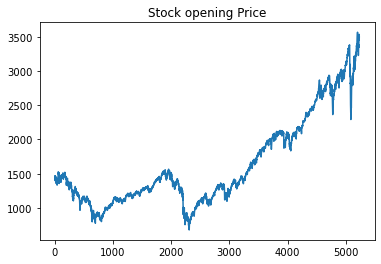

In [5]:
df['Open'].plot(label = 'Opening')
plt.title('Stock opening Price')

Text(0.5, 1.0, 'Stock Closing Price')

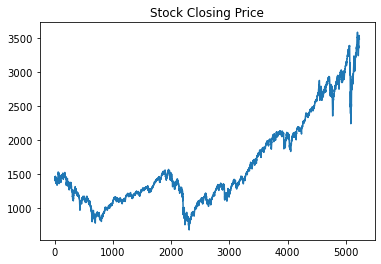

In [6]:
df['Close'].plot(label = 'Opening')
plt.title('Stock Closing Price')

Text(0.5, 1.0, 'Volume of stock trade')

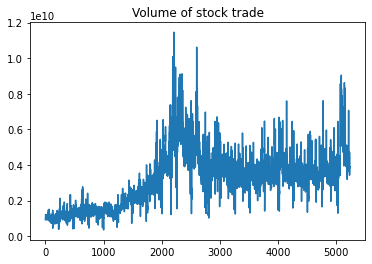

In [7]:
df['Volume'].plot(label = 'Opening')
plt.title('Volume of stock trade')

In [8]:
def append_date(df):    # Appending year, month and day column
    data = df
    data['date'] = pd.to_datetime( data.Date )
    data['year'], data['month'], data['day'] = data['date'].dt.year, \
                                               data['date'].dt.month, \
                                               data['date'].dt.day
    num_of_yrs   = np.size( np.where( ( np.unique( data['year'].values ))))
    data.iloc[:,0] = pd.to_datetime( data.iloc[:,0] )
    del data['date']
    return data, num_of_yrs
Data_datetime, num_of_years= append_date(df)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
5227,2020-10-12,3500.020020,3549.850098,3499.610107,3534.219971,3534.219971,3428970000,2020,10,12
5228,2020-10-13,3534.010010,3534.010010,3500.860107,3511.929932,3511.929932,3605150000,2020,10,13
5229,2020-10-14,3515.469971,3527.939941,3480.550049,3488.669922,3488.669922,3840630000,2020,10,14
5230,2020-10-15,3453.719971,3489.080078,3440.889893,3483.340088,3483.340088,3717640000,2020,10,15
5231,2020-10-16,3493.500000,3515.760010,3480.449951,3483.810059,3483.810059,4675890000,2020,10,16


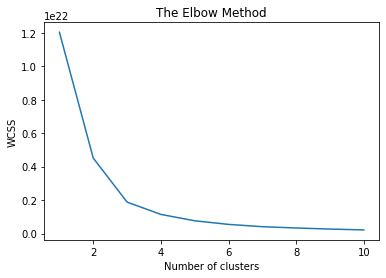

In [9]:
#Find the optimal number of clusters for daily valume data by Elbow Method.
X = df.iloc[: , 6:8].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

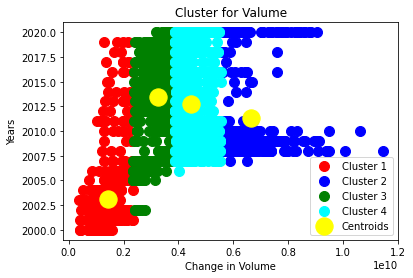

In [10]:
#As seen from figure elbow bending after 4 so selecting 4 clusters as optimal numbers of clusters. 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster for Valume')
plt.xlabel('Change in Volume')
plt.ylabel('Years')
plt.legend()
plt.show()

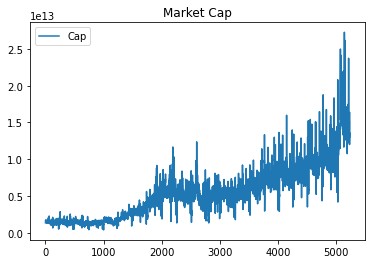

In [11]:
df['MarketCap'] = df['Open']*df['Volume']
df['MarketCap'].plot(label = 'Cap')
plt.title('Market Cap')
plt.legend()

<AxesSubplot:>

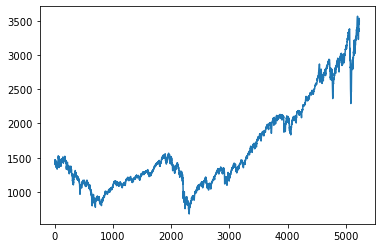

In [12]:
df['Open'].plot()

<AxesSubplot:>

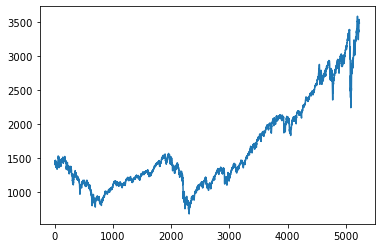

In [13]:
df['Close'].plot()

<AxesSubplot:>

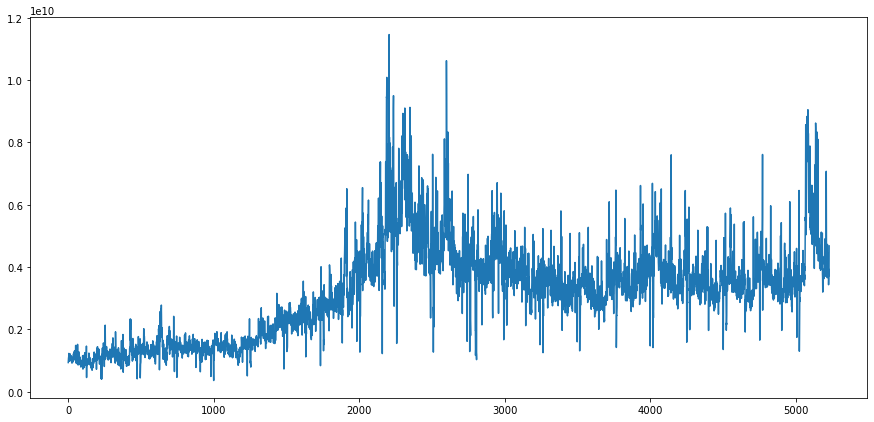

In [14]:
df['Volume'].plot(figsize = (15,7))

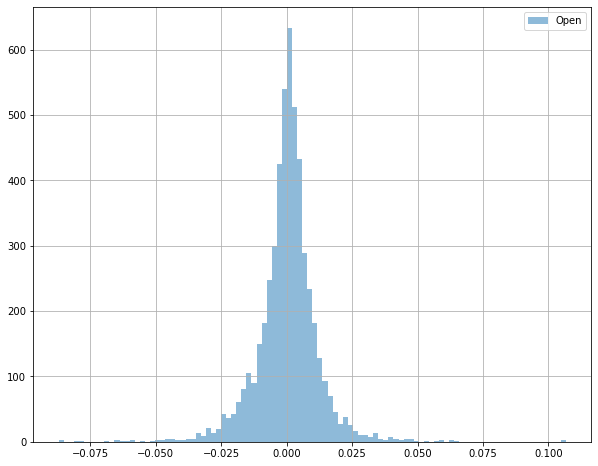

In [15]:
#Parameter1- fractional difference between current day open and previous day open
df['Parameter1'] = (df['Open']/df['Open'].shift(1)) -1
df['Parameter1'].hist(bins = 100, label = 'Open', alpha = 0.5, figsize = (10,8))
plt.legend()

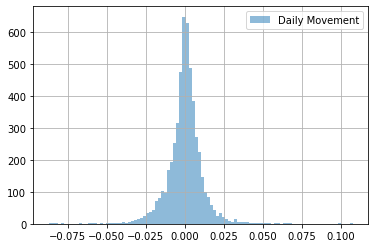

In [16]:
#Parameter 2 -  fractional difference between current day open and current day close
df['Parameter2'] = (df['Close']/df['Open'])-1
df['Parameter2'].hist(bins = 100, label = 'Daily Movement', alpha = 0.5)
plt.legend()

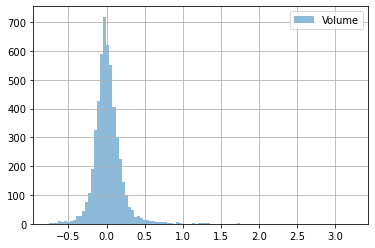

In [17]:
#Parameter 3 - fractional difference between current day volume and previous day volume
df['Parameter3'] = (df['Volume']/df['Volume'].shift(1)) - 1
df['Parameter3'].hist(bins = 100, label = 'Volume', alpha = 0.5)
plt.legend()

Clustering of parameters 1,2 and 3 


In [18]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,MarketCap,Parameter1,Parameter2,Parameter3
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,2000,1,3,1.369047e+12,NaN,-0.009549,NaN
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,2000,1,4,1.468317e+12,-0.009549,-0.038345,0.082850
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,2000,1,5,1.519070e+12,-0.038345,0.001922,0.075818
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,2000,1,6,1.531525e+12,0.001922,0.000956,0.006264
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,2000,1,7,1.719507e+12,0.000956,0.027090,0.121670


In [19]:
X_Para = df.iloc[: , 11:15 ]
X_Para.head()

,Parameter1,Parameter2,Parameter3
0,NaN,-0.009549,NaN
1,-0.009549,-0.038345,0.082850
2,-0.038345,0.001922,0.075818
3,0.001922,0.000956,0.006264
4,0.000956,0.027090,0.121670


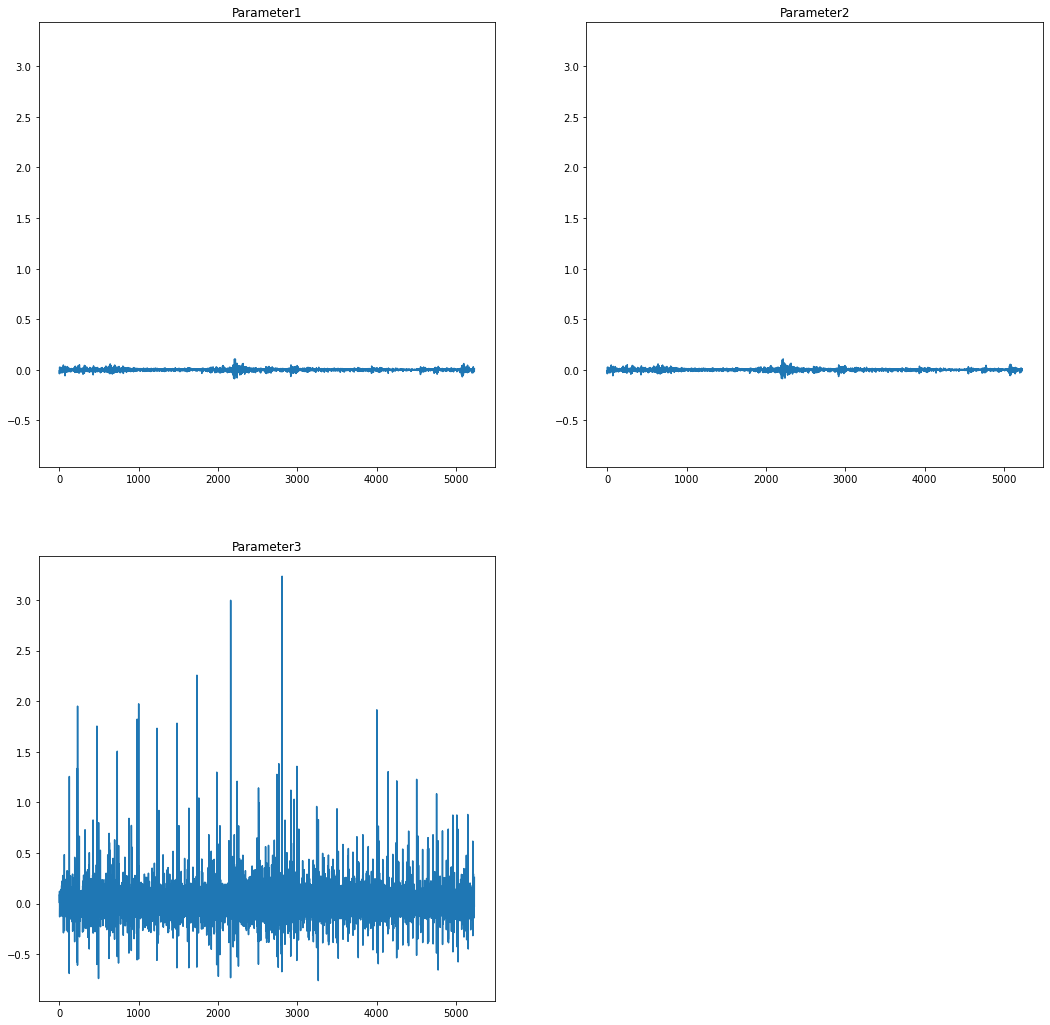

In [20]:
plt.figure(figsize=(18,18))
ax1 = plt.subplot(221)
plt.plot(X_Para['Parameter1'][:])
plt.title('Parameter1')
plt.subplot(222, sharey=ax1)
plt.plot(X_Para['Parameter2'][:])
plt.title('Parameter2')
plt.subplot(223, sharey=ax1)
plt.plot(X_Para['Parameter3'][:])
plt.title('Parameter3')
plt.show()

In [21]:
X_Para = X_Para.fillna(0)
X_Para = np.asarray([np.asarray(X_Para['Parameter1']),np.asarray(X_Para['Parameter2']),np.asarray(X_Para['Parameter3'])]).T

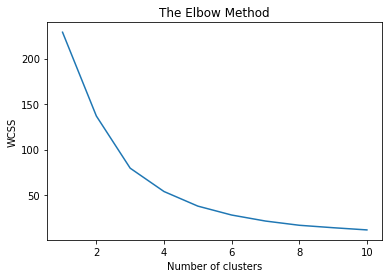

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_Para)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
from sklearn.decomposition import PCA
pca = PCA(3)
pca.fit(X_Para)
pca_data = pd.DataFrame(pca.transform(X_Para))
print(pca_data.head())

          0         1         2
0 -0.018278  0.005188  0.008276
1  0.064661  0.013190  0.037288
2  0.057576 -0.033089  0.019735
3 -0.012043  0.000969 -0.001553
4  0.103298 -0.014308 -0.023128


In [24]:
clusters = 6
from matplotlib import colors as mcolors
import math
colors = list(zip(*sorted((
                    tuple(mcolors.rgb_to_hsv(
                          mcolors.to_rgba(color)[:3])), name)
                     for name, color in dict(
                            mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
                                                      ).items())))[1]
  
  
# number of steps to taken generate n(clusters) colors
skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]

IndexError: tuple index out of range

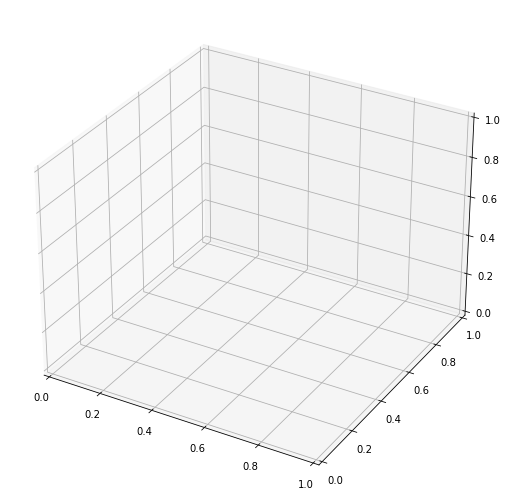

In [25]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2], 
           c = list(map(lambda label : cluster_colors[label],kmeans.labels_)))
list(map(lambda data1, data2, data3:
        ax.text(data1, data2, data3, size = 16.5,
        zorder = 20, color = 'k'), pca_data[0], pca_data[1],
        pca_data[2]))
  
plt.show()

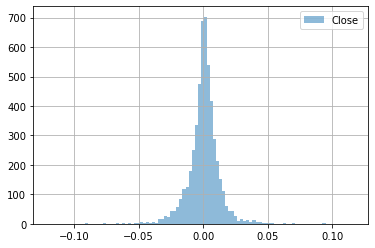

In [26]:
#fractional difference between current day Close and Previous day close
df['ReturnClose'] = (df['Close']/df['Close'].shift(1))-1
df['ReturnClose'].hist(bins = 100, label = 'Close', alpha = 0.5)
plt.legend()

In [28]:
df.to_csv('Daily Open, Close and Volume data.csv', index = False)

In [29]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,MarketCap,Parameter1,Parameter2,Parameter3,ReturnClose
5227,2020-10-12,3500.020020,3549.850098,3499.610107,3534.219971,3534.219971,3428970000,2020,10,12,1.200146e+13,0.011663,0.009771,-0.129495,0.016416
5228,2020-10-13,3534.010010,3534.010010,3500.860107,3511.929932,3511.929932,3605150000,2020,10,13,1.274064e+13,0.009711,-0.006248,0.051380,-0.006307
5229,2020-10-14,3515.469971,3527.939941,3480.550049,3488.669922,3488.669922,3840630000,2020,10,14,1.350162e+13,-0.005246,-0.007623,0.065318,-0.006623
5230,2020-10-15,3453.719971,3489.080078,3440.889893,3483.340088,3483.340088,3717640000,2020,10,15,1.283969e+13,-0.017565,0.008576,-0.032023,-0.001528
5231,2020-10-16,3493.500000,3515.760010,3480.449951,3483.810059,3483.810059,4675890000,2020,10,16,1.633522e+13,0.011518,-0.002774,0.257758,0.000135


In [30]:
#Compute the Monthly Return
data = df
#date columns are consisted with datestamps
data.loc[:, 'month'] = data.loc[:, 'Date'].apply(lambda x : x.strftime('%Y%m'))
# **<code1>** choosing first date from that month for each permno
df_MR = data.sort_values('Date').groupby(['month']).first().reset_index()
# **<code2>**  caclulate monthly_return by getting pct_change()
df_MR['monthly_return'] = df_MR.sort_values('month').groupby('year').Close.pct_change()

In [31]:
df_MR.head()

,month,Date,Open,High,Low,Close,Adj Close,Volume,year,day,MarketCap,Parameter1,Parameter2,Parameter3,ReturnClose,monthly_return
0,200001,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,2000,3,1.369047e+12,-0.009549,-0.009549,0.082850,-0.038345,NaN
1,200002,2000-02-01,1394.459961,1412.489990,1384.790039,1409.280029,1409.280029,981000000,2000,1,1.367965e+12,0.025218,0.010628,-0.012880,0.010628,-0.031569
2,200003,2000-03-01,1366.420044,1383.459961,1366.420044,1379.189941,1379.189941,1274100000,2000,1,1.740956e+12,0.013627,0.009346,0.057959,0.009346,-0.021351
3,200004,2000-04-03,1498.579956,1507.189941,1486.959961,1505.969971,1505.969971,1021700000,2000,3,1.531099e+12,0.007164,0.004931,-0.167590,0.004931,0.091924
4,200005,2000-05-01,1452.430054,1481.510010,1452.430054,1468.250000,1468.250000,966300000,2000,1,1.403483e+12,-0.008526,0.010892,-0.018586,0.010892,-0.025047


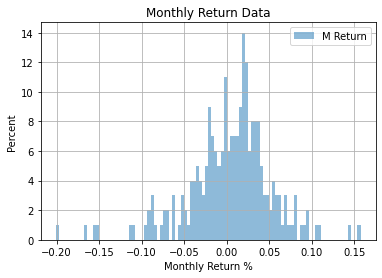

In [32]:
df_MR['monthly_return'].hist(bins = 100, label = 'M Return', alpha = 0.5)
plt.title('Monthly Return Data')
plt.xlabel('Monthly Return %')
plt.ylabel('Percent')
plt.legend()

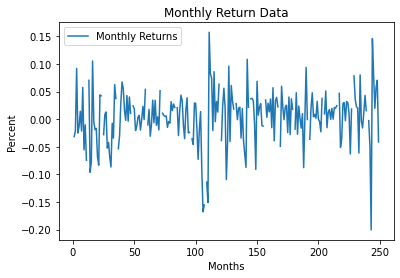

In [33]:
df_MR['monthly_return'].plot(label = 'Monthly Returns')
plt.title('Monthly Return Data')
plt.xlabel('Months')
plt.ylabel('Percent')
plt.legend()

In [34]:
exclude_feat = ['Date','Open','High','Low','Close','Adj Close','Volume','year','day','MarketCap','Parameter1','Parameter2','Parameter3','ReturnClose']
data_MR = df_MR[df_MR.columns.difference(exclude_feat)]
data_MR.head()
data_MR.to_csv('Monthly Return.csv', index= False)

In [35]:
df_MR['Strategy'] = np.where(df_MR.monthly_return > 0, 1, 0)

In [36]:
df_MR.head()

,month,Date,Open,High,Low,Close,Adj Close,Volume,year,day,MarketCap,Parameter1,Parameter2,Parameter3,ReturnClose,monthly_return,Strategy
0,200001,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,2000,3,1.369047e+12,-0.009549,-0.009549,0.082850,-0.038345,NaN,0
1,200002,2000-02-01,1394.459961,1412.489990,1384.790039,1409.280029,1409.280029,981000000,2000,1,1.367965e+12,0.025218,0.010628,-0.012880,0.010628,-0.031569,0
2,200003,2000-03-01,1366.420044,1383.459961,1366.420044,1379.189941,1379.189941,1274100000,2000,1,1.740956e+12,0.013627,0.009346,0.057959,0.009346,-0.021351,0
3,200004,2000-04-03,1498.579956,1507.189941,1486.959961,1505.969971,1505.969971,1021700000,2000,3,1.531099e+12,0.007164,0.004931,-0.167590,0.004931,0.091924,1
4,200005,2000-05-01,1452.430054,1481.510010,1452.430054,1468.250000,1468.250000,966300000,2000,1,1.403483e+12,-0.008526,0.010892,-0.018586,0.010892,-0.025047,0


In [37]:
from sklearn.tree import DecisionTreeClassifier
list_of_feature = ['High', 'Low', 'Close','Adj Close','Volume']
X_MR = df_MR[list_of_feature]
y_MR = df_MR['Strategy']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_MR, y_MR, test_size = 0.35, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(162, 5)
(88, 5)
(162,)
(88,)


In [54]:
tc = DecisionTreeClassifier(max_depth=2, min_samples_leaf = 6)
tc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=6)

In [55]:
y_pred = tc.predict(X_test)

In [56]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.17      0.28        46
           1       0.50      0.90      0.64        42

    accuracy                           0.52        88
   macro avg       0.58      0.54      0.46        88
weighted avg       0.59      0.52      0.45        88

